# Preparing Data

In [285]:
import pandas as pd
import numpy as np
cars = pd.read_csv("imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [286]:
# It seems that the dataset does not include the columns so need to add them in
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv("imports-85.data", names=columns)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [287]:
# Look at which colums are numeric and can be used as features for our model
# Price will be our target
numeric_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = cars[numeric_cols]

# Verify we have the relevent columns
cars.head(1)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495


In [288]:
# Replace all '?' values with NaN
cars.replace("?", np.nan, inplace=True)

cars.head(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500


In [289]:
# Because we removed non numeric columns, this should not return an error
cars = cars.astype(float)

print(cars.isnull().sum())

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [290]:
# We have some columns that have missing values, especially from 'normalized-losses'

# We should remove rows where 'price' is missing because this is our target column
cars.dropna(subset=['price'], axis=0, inplace=True)

# For every other column, we can fill the value in with the mean value for the column
cars.fillna(cars.mean(), inplace=True)

# Verify that we have no missing values remaining
cars.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [291]:
# Need to normalize data so values are between 0 to 1

# Don't normalize target column
cols = cars.columns.tolist()
cols.remove('price')

# Normalize
cars[cols] = (cars[cols] - cars[cols].min()) / (cars[cols].max() - cars[cols].min()) 

# Verify we have propery normalized our data
cars.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Creating a Univariate Model

In [292]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df, k_list):
    
    # Randomize our data
    np.random.seed(1)
    permuted_index = np.random.permutation(df.index)
    df = df.reindex(permuted_index)
    
    # Split our data into our training set(75%) and test set(25%)
    split_index = int(0.8 * df.shape[0])
    train_set = df[0:split_index]
    test_set = df[split_index:]
    
    rmses = dict()
    for k in k_list:
        # Instantiate our Kth Neighbor class
        knn = KNeighborsRegressor(n_neighbors=k)

        # Fit our model with our training data
        knn.fit(train_set[[train_col]], train_set[target_col])

        # Use the test set to make predictions based of the training set
        predictions = knn.predict(test_set[[train_col]])

        # Calculate the rmse -> sqrt(mse)
        mse = mean_squared_error(test_set[target_col], predictions)
        rmses[k] = np.sqrt(mse)
    
    return rmses

In [293]:
k_list = [1,3,5,7,9]
univariate_predictions = dict()

# Iterate through each column we want to train and make predictions using 
# the model we just created
for c in cols:
    univariate_predictions[c] = knn_train_test(c, 'price', cars, k_list)
univariate_predictions

{'bore': {1: 11325.623045371662,
  3: 11020.816129115008,
  5: 8570.096663996499,
  7: 8365.7978962270936,
  9: 8775.9419355798891},
 'city-mpg': {1: 4974.4166394099948,
  3: 3928.700182242369,
  5: 4004.2610651715481,
  7: 4081.310648036243,
  9: 4339.1906011571718},
 'compression-rate': {1: 7799.8283455158289,
  3: 6163.730431482084,
  5: 5823.9427304709034,
  7: 6157.7248722066115,
  9: 6407.4970998286017},
 'curb-weight': {1: 4185.38209637817,
  3: 3865.4854755980678,
  5: 3542.2325039719121,
  7: 3648.8946863475999,
  9: 3902.9189076894745},
 'height': {1: 6148.6606790699925,
  3: 7574.2770440377608,
  5: 7114.4664718805298,
  7: 7059.4162099980385,
  9: 7112.2081233779927},
 'highway-mpg': {1: 6099.731359538433,
  3: 4905.0038722155841,
  5: 4425.0005317899631,
  7: 4250.7808647564025,
  9: 4668.3135035233609},
 'horsepower': {1: 3403.5165064615298,
  3: 4619.2762549171257,
  5: 5037.2490864582414,
  7: 5031.196660115028,
  9: 5062.6372792566208},
 'length': {1: 5859.903974073794

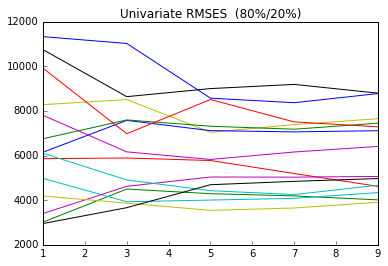

In [294]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the results for each of the columns
for var in univariate_predictions:
    df_col = pd.DataFrame.from_dict(univariate_predictions[var], orient='index')
    df_col = df_col.sort_index()
    plt.plot(df_col)

plt.title("Univariate RMSES  (80%/20%)")
plt.tick_params(right="off", top="off")
plt.show()

# Creating a Multivariate Model

In [295]:
# Redefine our function to accept a list of columns
def knn_train_test(train_cols, target_col, df, k_list):
    # Randomize our data
    np.random.seed(1)
    permuted_index = np.random.permutation(df.index)
    df = df.reindex(permuted_index)
    
    # Split our data into our training set(75%) and test set(25%)
    split_index = int(0.8 * df.shape[0])
    train_set = df[0:split_index]
    test_set = df[split_index:]
    
    rmses = dict()
    for k in k_list:
        # Instantiate our Kth Neighbor class
        knn = KNeighborsRegressor(n_neighbors=k)

        # Fit our model with our training data
        knn.fit(train_set[train_cols], train_set[target_col])

        # Use the test set to make predictions based of the training set
        predictions = knn.predict(test_set[train_cols])

        # Calculate the rmse -> sqrt(mse)
        mse = mean_squared_error(test_set[target_col], predictions)
        rmses[k] = np.sqrt(mse)
    
    return rmses

In [275]:
# Function will take a multi-level dict as input and sort it by the mean RMSE values
def sort_dict_to_df(dict_to_convert):
    sorted_predictions = dict_to_convert.copy()
    for var in sorted_predictions:
        vals = sorted_predictions[var].values()
        sorted_predictions[var]  = sum(vals) / len(vals)
    sorted_predictions = pd.DataFrame(list(sorted_predictions.items()), columns=['feature', 'mean_rmse'])
    sorted_predictions.sort_values(by='mean_rmse', inplace=True)
    sorted_predictions.reset_index(drop=True, inplace=True)
    return sorted_predictions

In [296]:
# sort our results
univariate_sorted = sort_dict_to_df(univariate_predictions)
univariate_sorted

,feature,mean_rmse
0,curb-weight,3828.982734
1,width,4001.692992
2,wheel-base,4223.784735
3,city-mpg,4265.575827
4,horsepower,4630.775157
5,highway-mpg,4869.766026
6,length,5467.788054
7,compression-rate,6470.544696
8,height,7001.805706
9,normalized-losses,7257.062661


In [297]:
multivariate_predictions = dict()

# run our multivariate model on each of the best n features
for i in range(2,6):
    multivariate_predictions["best " + str(i) + " features"] = (
        knn_train_test(
            univariate_sorted.loc[:i-1, "feature"],
            'price',
            cars,
            k_list
        )
    )

# Display the RMSE values
multivariate_predictions

{'best 2 features': {1: 2867.3400097838617,
  3: 2510.8661387930797,
  5: 2567.4007126882616,
  7: 2654.0890156017144,
  9: 2637.9205745897698},
 'best 3 features': {1: 2874.4666058753724,
  3: 3491.551185780731,
  5: 3440.8209013434503,
  7: 3069.6908442128665,
  9: 3132.2345980522873},
 'best 4 features': {1: 2540.0301995516011,
  3: 3135.2751524934492,
  5: 2928.6221726682161,
  7: 2823.8977868017168,
  9: 2826.0012711573495},
 'best 5 features': {1: 2809.746464562586,
  3: 2720.0787062182003,
  5: 2694.5142050053496,
  7: 2839.2830158863435,
  9: 2901.818885669356}}

# Optimizing Hyperparameter value

In [278]:
# Sort our dict into a dataframe by best n features
multivariate_sorted = sort_dict_to_df(multivariate_predictions)
multivariate_sorted

,feature,mean_rmse
0,best 2 features,2647.523290
1,best 5 features,2793.088255
2,best 4 features,2850.765317
3,best 3 features,3201.752827


In [279]:
# Going to try to optimize each of the top three results
top_three = multivariate_sorted[:3]['feature']

# Try k values 1-25
k_list = [i for i in range(1,26)]

hyper_predictions = dict()
for col in top_three:
    best_n = int(col.split()[1])
    hyper_predictions[col] = (
        knn_train_test (
            univariate_sorted.loc[:best_n-1, "feature"], 
            'price', 
            cars, 
            k_list
        )
     )
hyper_predictions

{'best 2 features': {1: 2867.3400097838617,
  2: 2356.4067972025628,
  3: 2510.8661387930797,
  4: 2436.4834024525653,
  5: 2567.4007126882616,
  6: 2495.8501225055243,
  7: 2654.0890156017144,
  8: 2735.6978970628138,
  9: 2637.9205745897698,
  10: 2631.2054288444469,
  11: 2787.209467623125,
  12: 2990.1481756139397,
  13: 3139.5401888864458,
  14: 3256.6142434111307,
  15: 3361.7797092537362,
  16: 3504.842911721184,
  17: 3598.033491035937,
  18: 3722.5301060225024,
  19: 3813.5811511498805,
  20: 3848.332332615792,
  21: 3775.8576384901708,
  22: 3850.2976972747952,
  23: 3885.4880136180773,
  24: 3981.0458733295022,
  25: 4072.8698125631031},
 'best 4 features': {1: 2540.0301995516011,
  2: 2774.5071865195773,
  3: 3135.2751524934492,
  4: 3386.4756486054289,
  5: 2928.6221726682161,
  6: 2777.5394603730729,
  7: 2823.8977868017168,
  8: 2808.5009041312587,
  9: 2826.0012711573495,
  10: 2994.9427290831136,
  11: 3245.1245757279567,
  12: 3363.5710531124564,
  13: 3419.8361664555

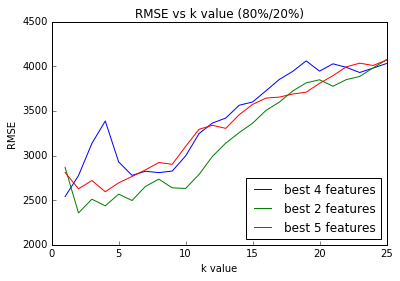

In [283]:
# Plot the results for each of the columns
for var in hyper_predictions:
    df_col = pd.DataFrame.from_dict(hyper_predictions[var], orient='index')
    df_col = df_col.sort_index()
    plt.plot(df_col)


plt.tick_params(right="off", top="off")
plt.legend(labels=hyper_predictions.keys(), loc='lower right')
plt.title("RMSE vs k value (80%/20%)")
plt.xlabel("k value")
plt.ylabel("RMSE")
plt.show()